In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import time
import imageio.v2 as imageio
import tempfile
from IPython.display import Markdown, display, Video
from io import BytesIO
import os

assesment_draw_and_fill = False


# Automatic Differentiation

A brief informal introduction to automatic differentiation.

A Neural Network is a function implemented using a composition of small functions. The building blocks of Neural Networks are linear projections and non linear activation functions.

How do we compute the derivative a composite function? Using the chain rule. What pytorch, tensorflow or Jax does is computing this derivatives for any function we specify. So our task is:

1. Specify the function
2. Tell pytorch which derivatives do we want to obtain.

## Basic function

Let's start with the function:

$$
y = (x^2 - 4)^3 + 2
$$

The derivative is

$$
\frac{\partial y}{\partial x} = \text{...}
$$

something we usually derive implicitely using our knowledge of basic derivatives, such that the derivative of $f(x)^{n}$ is $f(x)^{n-1} \cdot f'(x)$. 

However, when things get complicate we need to specify a way to obtain complex derivatives, and this is where the chain rule comes into place. For functions $f:\mathbb{R} \rightarrow \mathbb{R}$, we can use the one-dimensional chain rule. 

The idea of the chain rule is to express functions as composition of elementary functions from which the derivative is well known. In our example we could break into a small composition of functions.

$$
y = (x^2 - 4)^3 + 2
$$

could be written as:

$$
\begin{split}
t = \text{...}\\
u = \text{...}\\
z = \text{...}\\
y = \text{...} 
\end{split}
$$

Let's start substituting to show it is equivalent. First subsitute $z = \text{...}$ into $y = \text{...}$, yielding $y = \text{...}$. Now do the same thing and substitute $u = \text{...}$ into $y = \text{...}$, yielding: $y = \text{...}$, and finally subsitute  $t = \text{...}$ into  $y = \text{...}$ yielding $y = ( x^2 - 4)^3 + 2$, which is our original function.

When broken into small functions, we know that the full derivative can be obtained by multiplying the derivatives of the individual functions. In other words:

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial z}\frac{\partial z}{\partial u}\frac{\partial u}{\partial t}\frac{\partial t}{\partial x}
$$

Obviously, the derivative of these small functions are usually easier and well known. In fact, the most important thing is that this gives a principle way of obtaining complex derivatives in a structured and well-ordered way. In fact, in this example when you applied the rule $f(x)^{n}$ is $f(x)^{n-1} \cdot f'(x)$, to obtain $\frac{\partial y}{\partial x}$ directly, you are implicitely applying the chain rule without noticing it.

Let's do it:

$$
\begin{split}
\frac{\partial y}{\partial z} = \text{...} \\
\frac{\partial z}{\partial u} = \text{...} \\
\frac{\partial u}{\partial t} = \text{...} \\
\frac{\partial t}{\partial x} = \text{...} \\
\end{split}
$$

So applying chain rule we have:

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial z}\frac{\partial z}{\partial u}\frac{\partial u}{\partial t}\frac{\partial t}{\partial x} = \text{...}
$$

Note that the last is step is to actually have a derivative which is a function of $x$. In other words, we need to replace the value of $u$ in this example. So using a similar proceedure as above we know the steps to perform are:
1. substitute $t = \text{...}$ into $u = \text{...}$ to yield $u = \text{...}$, finishing the subsitution.
2. If we place this result back into the derivative, subsituting $u$ by this expression that depends on $x$ we yield:

$$
\frac{\partial y}{\partial x} = \frac{\partial y}{\partial z}\frac{\partial z}{\partial u}\frac{\partial u}{\partial t}\frac{\partial t}{\partial x} = \text{...} = 3(x^2 - 4)^2 \cdot 2x
$$

which happily matches the original derivative we obtained. For multivariate functions $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$, things change a bit but that is a story for another chapter.

## Programming derivatives (numpy)

We can code up this example using numpy, where we code up both forward and backward computational graphs. The forward computational graph is refered to the set of operations that provide $y$ from $x$, i.e. the funciton $y(x) = (x^2 - 4)^3 + 2$, while the backward computatinoal graph is the derivative of $y$ w.r.t $x$, i.e. the function $\frac{\partial y}{\partial x} =  3 \cdot (x^2 - 4)^2 \cdot 2 x$. Both computatinoal graphs can be obtained directly or using chain rule.

Implement these computational graphs:

```python
def y_of_x(x: np.array):
    """Evaluates the function $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments."""
    y = ...
    return y

def y_of_x_from_compositions(x: np.array):
    """Evaluates the function $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments.

    Using the following composition of functions.

    $$
    \begin{split}
    \text{...}
    \end{split}
    $$
    
    """
    t = ...
    u = ...
    z = ...
    y = ...
    return y


def partial_y_partial_x(x : np.array):
    """Evaluates the derivative of $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments."""
    dy_dx = ...
    
    return dy_dx

def partial_y_partial_x_chain_rule(x : np.array):
    """Evaluates the derivative of $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments, using chain rule.
    
    To do so we use composition:

    $$
    \begin{split}
    t = \text{...} \\
    u = \text{...} \\
    z = \text{...} \\
    y = \text{...}
    \end{split}
    $$

    using partial derivatives:

    $$
    \begin{split}
    \frac{\partial y}{\partial z} = \text{...}
    \frac{\partial z}{\partial u} = \text{...}
    \frac{\partial u}{\partial t} = \text{...}
    \frac{\partial t}{\partial x} = \text{...}
    \end{split}
    $$
    """
    # we need to go through the function computation, (i.e forward operation) to obtain derivative using chain rule, so that 
    # we can replace u in the derivative.
    t = ...
    u = ...
    z = ...
    y = ...
    
    dt_dx = ...
    du_dt = ...
    dz_du = ...
    dy_dz = ...

    
    dy_dx = dy_dz * dz_du * du_dt * dt_dx
    
    return dy_dx
```

In [2]:
def y_of_x(x: np.array):
    """Evaluates the function $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments."""
    y = (x**2 - 4)**3 + 2
    return y

def y_of_x_from_compositions(x: np.array):
    """Evaluates the function $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments.

    Using the following composition of functions.

    $$
    \begin{split}
    t = x^2 \\
    u = t - 4 \\
    z = u^3 \\
    y = z + 2 
    \end{split}
    $$
    
    """
    t = x**2
    u = t-4
    z = u**3
    y = z+2
    return y


def partial_y_partial_x(x : np.array):
    """Evaluates the derivative of $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments."""
    dy_dx = 3 * (x**2 - 4)**2 * 2 * x
    
    return dy_dx

def partial_y_partial_x_chain_rule(x : np.array):
    """Evaluates the derivative of $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments, using chain rule.
    
    To do so we use composition:

    $$
    \begin{split}
    t = x^2 \\
    u = t - 4 \\
    z = u^3 \\
    y = z + 2 
    \end{split}
    $$

    using partial derivatives:

    $$
    \begin{split}
    \frac{\partial y}{\partial z} = 1
    \frac{\partial z}{\partial u} = 3u^2
    \frac{\partial u}{\partial t} = 1
    \frac{\partial t}{\partial x} = 2x
    \end{split}
    $$
    """
    # we need to go through the function computation, (i.e forward operation) to obtain derivative using chain rule, so that 
    # we can replace u in the derivative.
    t = x**2
    u = t-4
    z = u**3
    y = z+2
    
    dt_dx = 2*x
    du_dt = 1
    dz_du = 3*u**2
    dy_dz = 1

    
    dy_dx = dy_dz * dz_du * du_dt * dt_dx
    
    return dy_dx

Once the above functions are implemented complete the following code:

```python
## range over which we want to plot the function
x_min = -2.5
x_max = 2.5
N_points = 100

x = ...

## Using direct computation
y = ...
dy_dx = ...

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.plot(..., label = '$y(x) = (x^2 - 4)^3 + 2$', linewidth = 5)
ax2.plot(..., label = '$y(x) = (x^2 - 4)^3 + 2$', linewidth = 5)
ax2.plot(..., label = r'$\frac{\partial y}{\partial x} = 3(x^2 - 4)^2 \cdot 2x$', linewidth = 5)
ax1.legend()
ax2.legend()
plt.suptitle("Direct Computation", fontsize = 40)

## Using composition of functions and chain rule
y = ...
dy_dx = ...

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.plot(..., label = '$y(x) = (x^2 - 4)^3 + 2$', linewidth = 5)
ax2.plot(..., label = '$y(x) = (x^2 - 4)^3 + 2$', linewidth = 5)
ax2.plot(..., label = r'$\frac{\partial y}{\partial x} = 3(x^2 - 4)^2 \cdot 2x$', linewidth = 5)
ax1.legend()
ax2.legend()
plt.suptitle("Using Chain Rule", fontsize = 40)
```

Text(0.5, 0.98, 'Using Chain Rule')

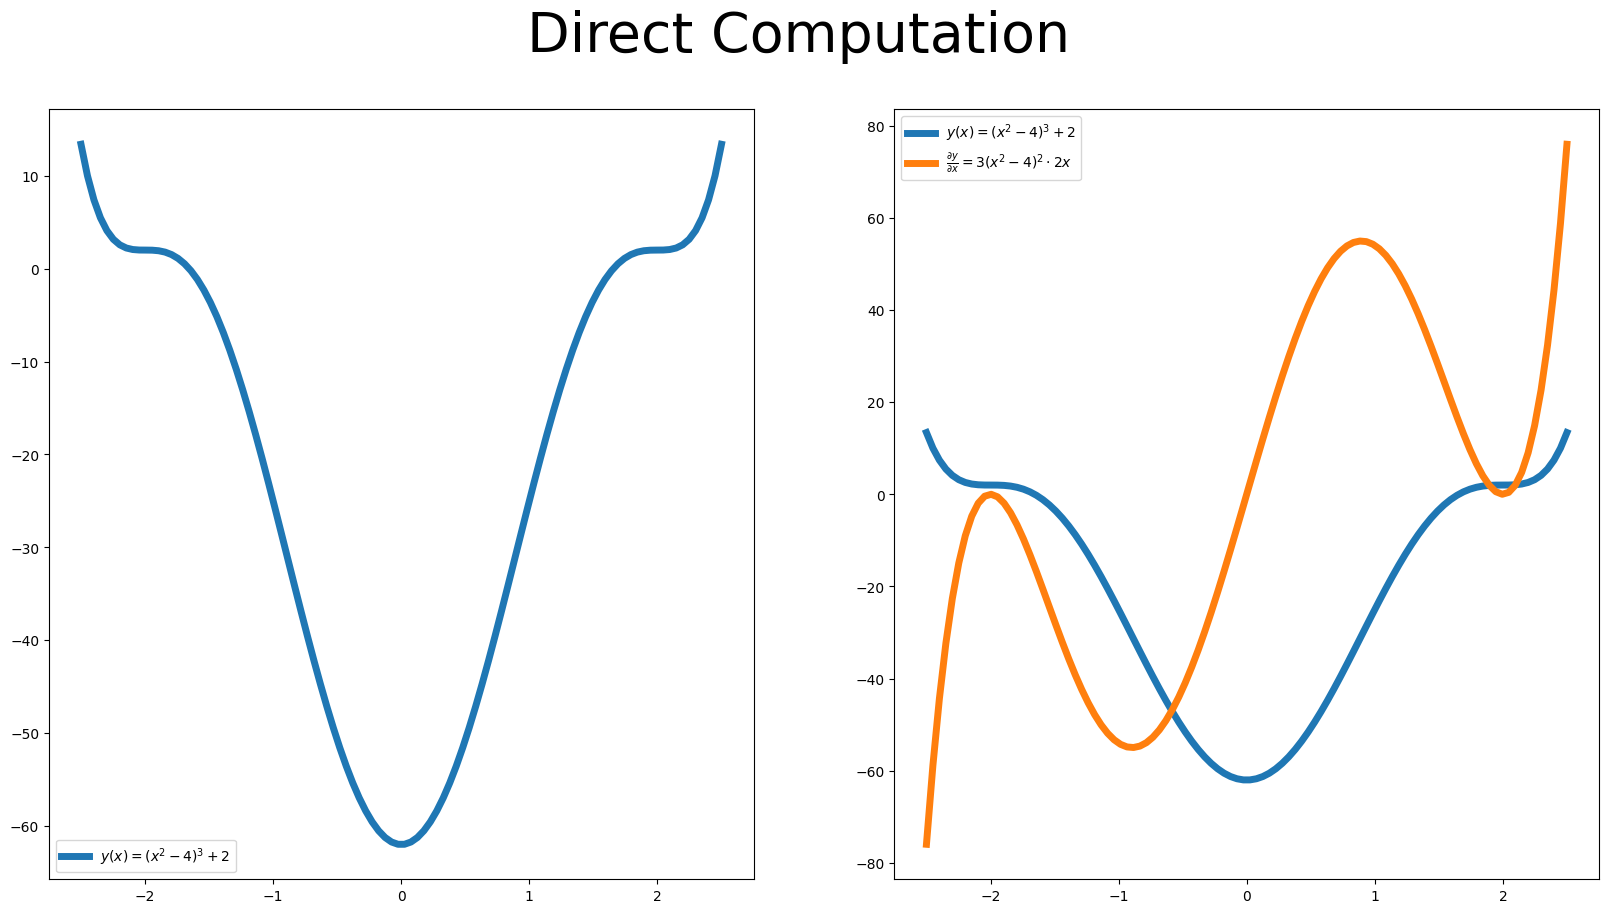

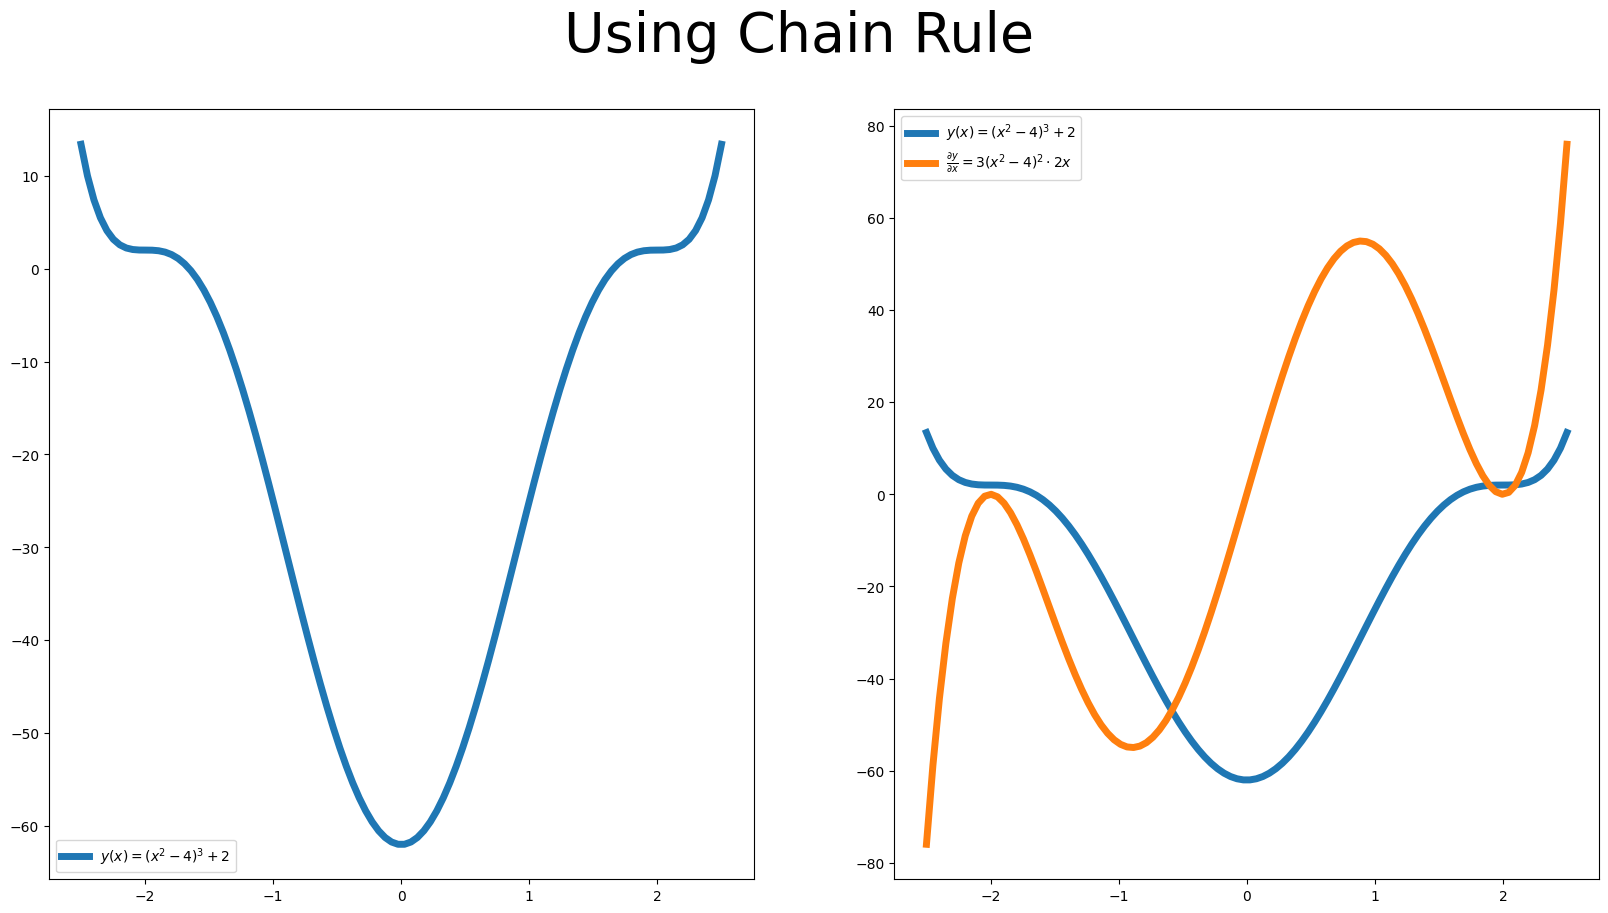

In [3]:
## range over which we want to plot the function
x_min = -2.5
x_max = 2.5
N_points = 100

x = np.linspace(x_min,x_max,N_points)

## Using direct computation
y = y_of_x(x)
dy_dx = partial_y_partial_x(x)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.plot(x,y, label = '$y(x) = (x^2 - 4)^3 + 2$', linewidth = 5)
ax2.plot(x,y, label = '$y(x) = (x^2 - 4)^3 + 2$', linewidth = 5)
ax2.plot(x, dy_dx, label = r'$\frac{\partial y}{\partial x} = 3(x^2 - 4)^2 \cdot 2x$', linewidth = 5)
ax1.legend()
ax2.legend()
plt.suptitle("Direct Computation", fontsize = 40)

## Using composition of functions and chain rule
y = y_of_x_from_compositions(x)
dy_dx = partial_y_partial_x_chain_rule(x)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.plot(x,y, label = '$y(x) = (x^2 - 4)^3 + 2$', linewidth = 5)
ax2.plot(x,y, label = '$y(x) = (x^2 - 4)^3 + 2$', linewidth = 5)
ax2.plot(x, dy_dx, label = r'$\frac{\partial y}{\partial x} = 3(x^2 - 4)^2 \cdot 2x$', linewidth = 5)
ax1.legend()
ax2.legend()
plt.suptitle("Using Chain Rule", fontsize = 40)

## Programming derivatives (torch / tensorflow / jax)

What advanced machine learning tools such as torch do to is compute the backward computational graph, from the forward computational graph provide by the user. In other words, tell pytorch which is your target function $y(x)$, through operations, and pytorch will obtain the derivatives automatically, no matter how complex the functions are.

Interestingly, you will notice that the python code is very similar to that used in numpy. The only requirement is to use torch tensors. We also need to tell torch what variables we want the gradient from. 

Complete the following code:
    
```python
def y_of_x_torch(x : torch.tensor):
    """Evaluates the function $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments."""
    y = ...
    return y

## with pytorch we can create the associated gradient function by just specifying the computational_graph. This tell us
#  pytorch to provide a funciton that obtains the grad of y_of_x(x) wrt x. Forget about vmap and grad, they are advanced 
#  functions you wont use yet but are useful to me to show what I want to show.
dy_dx_fun = torch.func.vmap( torch.func.grad(y_of_x_torch, argnums = 0) )

## range over which we want to plot the function
x_min = -3
x_max = 3
N_points = 100

x = ...

## conver to torch tensor.
x = ...
## Tell pytorch this tensor requires grad so gradient is saved
x.requires_grad = ...

## Forward operation: compute y(x)
y = ...

## Backward operation: evaluate the gradient function
dy_dx = dy_dx_fun(x)

## Convert back to numpy vectors. We use detach since vectors require gradients
x = x.detach().numpy()
y = y.detach().numpy()
dy_dx = dy_dx.detach().numpy()

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.plot(..., label = '$y(x)$', linewidth = 5)
ax2.plot(..., label = '$y(x)$', linewidth = 5)
ax2.plot(..., label = r'$\frac{\partial y}{\partial x}$', linewidth = 5)
ax1.legend()
ax2.legend()
plt.suptitle("Computation with Automatic Differentiation", fontsize = 40)
```

In [4]:
def y_of_x_torch(x : torch.tensor):
    """Evaluates the function $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments."""
    y = (x**2 - 4)**3+2
    return y

## with pytorch we can create the associated gradient function by just specifying the computational_graph. This tell us
#  pytorch to provide a funciton that obtains the grad of y_of_x(x) wrt x. Forget about vmap and grad, they are advanced 
#  functions you wont use yet but are useful to me to show what I want to show.
dy_dx_fun = torch.func.vmap( torch.func.grad(y_of_x_torch, argnums = 0) )

Text(0.5, 0.98, 'Computation with Automatic Differentiation')

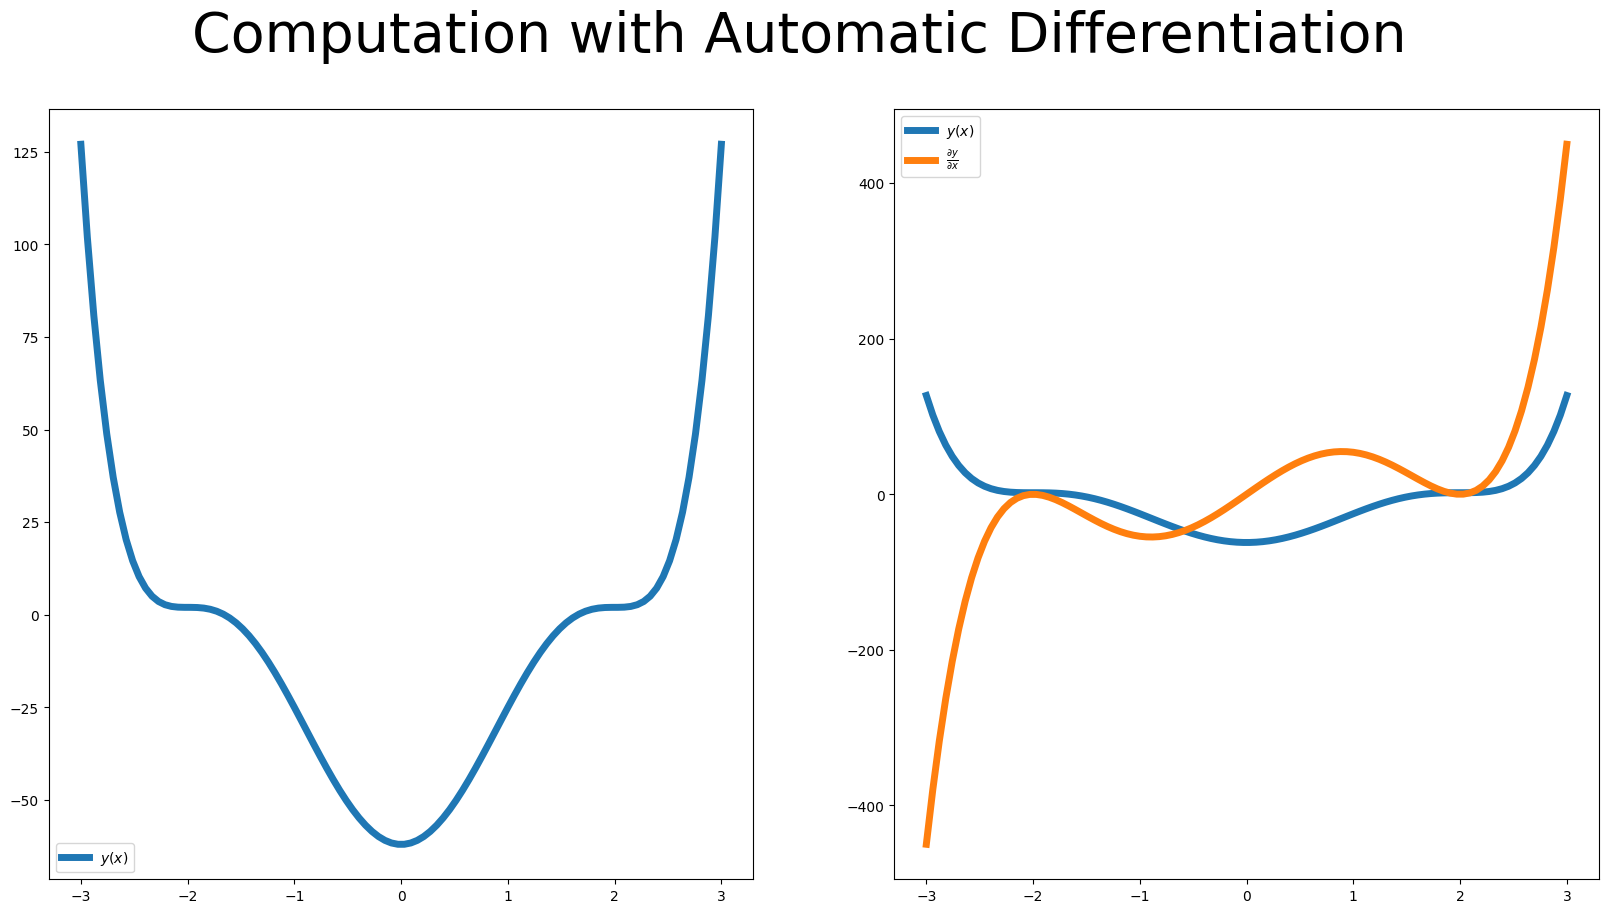

In [5]:
## range over which we want to plot the function
x_min = -3
x_max = 3
N_points = 100

x = np.linspace(x_min,x_max,N_points)

## conver to torch tensor.
x = torch.from_numpy(x)
## Tell pytorch this tensor requires grad so gradient is saved
x.requires_grad = True

## Forward operation: compute y(x)
y = y_of_x(x)

## Backward operation: evaluate the gradient function
dy_dx = dy_dx_fun(x)

## Convert back to numpy vectors. We use detach since vectors require gradients
x = x.detach().numpy()
y = y.detach().numpy()
dy_dx = dy_dx.detach().numpy()

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.plot(x,y, label = '$y(x)$', linewidth = 5)
ax2.plot(x,y, label = '$y(x)$', linewidth = 5)
ax2.plot(x, dy_dx, label = r'$\frac{\partial y}{\partial x}$', linewidth = 5)
ax1.legend()
ax2.legend()
plt.suptitle("Computation with Automatic Differentiation", fontsize = 40)

Obviously, the result is the same as when you computed the derivatives manually. The good point is that now you can change the computational graph as you want, and the way we compute the derivative is let to pytorch. Try and change the computational graph specified by function: 

```python
def y_of_x(x : torch.tensor):
    """Evaluates the function $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments."""
    y = (x**2 - 4)**3 + 2
    return y
```

to whatever function you want. In this example, you have used pytorch to obtain a computational graph for the gradient function. However, for your use case, you will only need the gradient at a single point. This can be easily obtained using the backward() function from pytorch.

To do so, complete the following code
```python
## torch tensor point at which we want the gradient
x = ...

## evaluate the derivative at that point using torch function
dy_dx = dy_dx_fun(x)

## evaluate the derivative at that point using our numpy function
dy_dx_np = ...

## evaluate the derivative at that point using our chain rule numpy function
dy_dx_np_cr = ...

## ===========================================
## obtain the derivative at the point directly

# forward through computational graph in pytorch
y = ...
# obtain derivatives wrt to all tensors that require gradient
y.backward()
# observe the gradient
print('Gradient using the gradient function evaluated at a point ', dy_dx.detach().numpy())
print('Gradient using the gradient function using numpy grad function ', dy_dx_np)
print('Gradient using the gradient function using chain rule numpy grad function ', dy_dx_np_cr)
print('Gradient of a tensor using backward on computational graph ', x.grad.detach().numpy())
```

In [6]:
## torch tensor point at which we want the gradient
x = torch.tensor([1.], requires_grad = True)

## evaluate the derivative at that point using torch function
dy_dx = dy_dx_fun(x)

## evaluate the derivative at that point using our numpy function
dy_dx_np = partial_y_partial_x(x.detach().numpy())

## evaluate the derivative at that point using our chain rule numpy function
dy_dx_np_cr = partial_y_partial_x_chain_rule(x.detach().numpy())

## ===========================================
## obtain the derivative at the point directly

# forward through computational graph in pytorch
y = y_of_x_torch(x)
# obtain derivatives wrt to all tensors that require gradient
y.backward()
# observe the gradient
print('Gradient using the gradient function evaluated at a point ', dy_dx.detach().numpy())
print('Gradient using the gradient function using numpy grad function ', dy_dx_np)
print('Gradient using the gradient function using chain rule numpy grad function ', dy_dx_np_cr)
print('Gradient of a tensor using backward on computational graph ', x.grad.detach().numpy())

Gradient using the gradient function evaluated at a point  [54.]
Gradient using the gradient function using numpy grad function  [54.]
Gradient using the gradient function using chain rule numpy grad function  [54.]
Gradient of a tensor using backward on computational graph  [54.]


## Derivatives w.r.t multiple variables

So far so good, we have seen how to obtain the derivative of $y$ wrt $x$, for functions $f : \mathbb{R} \rightarrow \mathbb{R}$. But what if $y$ depends on two variables $x$ and $z$?. Well this is where the multivariate chain rule steps in and I am not going to provide details. However, as you can expect pytorch is able to obtain the derivatives of any function w.r.t any input variable. Just tell it to do it.

To tell it to do it you need to specify:
1. the computational graph.
2. The variables you want pytorch to compute computational graph from.

Importantly, pytorch will implicitely compute and save gradients for all intermediate variables that come from operations that involve at least one tensor that requires gradient. 

Suppose the function.

$$
\begin{split}
u =  2x + z\\
y = (3-u)^2 + z
\end{split}
$$

Copy paste this code and execute it:

```python
## First case: Compute derivative wrt x and z
x = torch.tensor([2.], requires_grad = True)
z = torch.tensor([3.], requires_grad = True)

# forward: compute y from inputs x and z
u = 2*x +z
y = (3-u)**2 + z

## Backward: compute gradient wrt tensors that require grad. 
#  u also requires grad since it comes from operations involving tensor that do require grad (x and z).
y.backward()

print('u requires grad: ', u.requires_grad)
print('Gradient of y wrt x: ', x.grad)
print('Gradient of y wrt z: ', z.grad)

## =====================================
## Second case: Compute derivative wrt x
x = torch.tensor([2.], requires_grad = True)
z = torch.tensor([3.], requires_grad = False)

# forward: compute y from inputs x and z
u = 2*x +z
y = (3-u)**2 + z

## Backward: compute gradient wrt tensors that require grad. 
#  u also requires grad since it comes from operations involving tensor that do require grad (x and z).
y.backward()

print('u requires grad: ', u.requires_grad)
print('Gradient of y wrt x: ', x.grad)
print('Gradient of y wrt z: ', z.grad)

## =====================================
## Third case: Compute derivative wrt z
x = torch.tensor([2.], requires_grad = False)
z = torch.tensor([3.], requires_grad = True)

# forward: compute y from inputs x and z
u = 2*x +z
y = (3-u)**2 + z

## Backward: compute gradient wrt tensors that require grad. 
#  u also requires grad since it comes from operations involving tensor that do require grad (x and z).
y.backward()

print('u requires grad: ', u.requires_grad)
print('Gradient of y wrt x: ', x.grad)
print('Gradient of y wrt z: ', z.grad)
```

In [7]:
## First case: Compute derivative wrt x and z
x = torch.tensor([2.], requires_grad = True)
z = torch.tensor([3.], requires_grad = True)

# forward: compute y from inputs x and z
u = 2*x +z
y = (3-u)**2 + z

## Backward: compute gradient wrt tensors that require grad. 
#  u also requires grad since it comes from operations involving tensor that do require grad (x and z).
y.backward()

print('u requires grad: ', u.requires_grad)
print('Gradient of y wrt x: ', x.grad)
print('Gradient of y wrt z: ', z.grad)

## =====================================
## Second case: Compute derivative wrt x
x = torch.tensor([2.], requires_grad = True)
z = torch.tensor([3.], requires_grad = False)

# forward: compute y from inputs x and z
u = 2*x +z
y = (3-u)**2 + z

## Backward: compute gradient wrt tensors that require grad. 
#  u also requires grad since it comes from operations involving tensor that do require grad (x and z).
y.backward()

print('u requires grad: ', u.requires_grad)
print('Gradient of y wrt x: ', x.grad)
print('Gradient of y wrt z: ', z.grad)

## =====================================
## Third case: Compute derivative wrt z
x = torch.tensor([2.], requires_grad = False)
z = torch.tensor([3.], requires_grad = True)

# forward: compute y from inputs x and z
u = 2*x +z
y = (3-u)**2 + z

## Backward: compute gradient wrt tensors that require grad. 
#  u also requires grad since it comes from operations involving tensor that do require grad (x and z).
y.backward()

print('u requires grad: ', u.requires_grad)
print('Gradient of y wrt x: ', x.grad)
print('Gradient of y wrt z: ', z.grad)

u requires grad:  True
Gradient of y wrt x:  tensor([16.])
Gradient of y wrt z:  tensor([9.])
u requires grad:  True
Gradient of y wrt x:  tensor([16.])
Gradient of y wrt z:  None
u requires grad:  True
Gradient of y wrt x:  None
Gradient of y wrt z:  tensor([9.])


## 1. Regresion $f:\mathbb{R} \rightarrow \mathbb{R}$

Let's come back to our initial problem and try and solve it using pytorch instead of numpy. If you solved the previous assignment using pytorch, then it should be really straightforward to solve gradient descent now modifying your previous code. 

Our goal now is not to provide fancy pictures to understand things, just to see how pytorch makes our life easier.

Our data was:

$$
(x_1,t_1) = (0,0.2)\\
(x_2,t_2) = (1,0.5)\\
(x_3,t_3) = (2,2.8)
$$

which should be wrapped into torch tensors as:

```python
# input to our model. Represents time in seconds
x_data = torch.from_numpy(np.array([0,1,2]).reshape(3,1))
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = torch.from_numpy(np.array([0.2,0.5,2.8]).reshape(3,1))
```

### 1.1 Plot data

In [8]:
if assesment_draw_and_fill:
    code = """
```python
# input to our model. Represents time in seconds
x_data = torch.from_numpy((...).reshape(3,1)).float()
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = torch.from_numpy((...).reshape(3,1)).float()

## display
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
for i in range(len(x_data)):
    plt.text(x_data[i], t_data[i] + 0.1, f"$(x_{i+1},t_{i+1})=({float(x_data[i]):.2f},{float(t_data[i]):.2f})$", fontsize=8, ha="center")  # Etiqueta sobre el punto
plt.xlabel('altura')
plt.ylabel('peso')
plt.ylim([0,3.5])
plt.xlim([-0.5,2.5])
plt.legend()
```
"""

    display(Markdown(code))
        


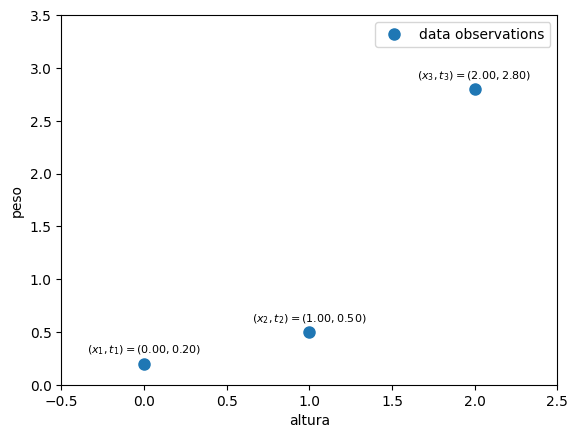

In [9]:
# input to our model. Represents time in seconds
x_data = torch.from_numpy(np.array([0,1,2]).reshape(3,1)).float()
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = torch.from_numpy(np.array([0.2,0.5,2.8]).reshape(3,1)).float()

## display
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
for i in range(len(x_data)):
    plt.text(x_data[i], t_data[i] + 0.1, f"$(x_{i+1},t_{i+1})=({float(x_data[i]):.2f},{float(t_data[i]):.2f})$", fontsize=8, ha="center")  # Etiqueta sobre el punto
plt.xlabel('altura')
plt.ylabel('peso')
plt.ylim([0,3.5])
plt.xlim([-0.5,2.5])
plt.legend()

### 1.2 Initialization

The first step in a machine learning model is model initialization. For linear regression we need to initialize the the weight $w$ and bias $b$.

Since for backpropagation we want gradient descent to update these parameters, we need to tell pytorch that these parameters should require gradient computation.

Initialize the variables $w$ and $b$ with values around $0$, and wrap them in a list of tuples, such that:

```python
parameters = [(w,b)]
```

You are free to use the data structure you want, this is just a suggestion.

In [10]:
if assesment_draw_and_fill:
    code = """
```python
    w = torch.from_numpy(...).float()
    w.requires_grad = ...
    b = ...
    b.requires_grad = ...
    parameters = [(w,b)]
```
"""

    display(Markdown(code))

In [11]:
w = torch.from_numpy(np.ones((1,1))).float()
w.requires_grad = True
b = torch.from_numpy(np.zeros(1)).float()
b.requires_grad = True

parameters = [(w,b)]

### 1.3 Computational graph creation

We just need to tell pytorch what is the computational graph to differentiate. This is easy. In linear regresion we just have:

$$
y = w\cdot x+ b
$$

The step of computing the output given the input is usually known in the literature as the *forward* operation. Let's create a function that receives the *parameters* variable and the input $x$ and returns the predictions $y$. The inputs $x$ should be feed as a matrix with rows being the sample and columns the feature. So in this case we will have a matrix of size $(N,1)$ where $N$ represents the total number of samples.

```python
def forward(X,parameters):
    ...  
    return y
```

In [12]:
if assesment_draw_and_fill:
    code = """
```python
    def forward(X,parameters):
        for w,b in parameters:
            y = X ... w ... b
        return y
```
"""
    display(Markdown(code))

In [13]:
def forward(X,parameters):
    for w,b in parameters:
        y = torch.mm(X,w) + b
    return y

### 1.4 Loss function computation

We want to optimize a loss funciton w.r.t the parameters of the model. To do so we need to compute the loss funciton, which is the element we will tell pytorch to get the derivative w.r.t. the parameters.

This step also belongs to the *forward* operation.

Most of the loss functions are provided in the pytorch library.

Implement four loss functions: square difference, absolute diference, square diference using pytorch library (https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html), and absolute difference using pytorch library (https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html).

Our goal is just to compare that custom loss function creations gives exactly the same result as using pytorch.

Implement four functions that given $t$ and $y$ return the loss.

```python
def loss_function_square(t,y):
        ...
        return L
    
def loss_function_absolute(t,y):
        ...
        return L

def loss_function_square_torch(t,y):
        ...
        return L
    
def loss_function_absolute_torch(t,y):
        ...
        return L
```


In [14]:
def loss_function_square(t,y):
    L = torch.sum((t-y)**2)
    return L
      
def loss_function_absolute(t,y):
    L = torch.sum(torch.abs(t-y))
    return L

def loss_function_square_torch(t,y):
    L = torch.nn.functional.mse_loss(y,t)
    return L
    
def loss_function_absolute_torch(t,y):
    L = torch.nn.functional.l1_loss(y,t)
    return L

### 1.5 Implement gradient descent

You now have all the ingredients to compute gradient descent easily, where you will see where is the power of pytorch. Just specify computational graph, and let it do the rest. 

Your goal know is to implement an iterative algorithm that implements gradient descent using the functionalities above.

One important thing to consider is that pytorch saves the accumulated gradient into `variable.grad` as you know. Between each gradient update we need to reset the gradient after updating the parametres. This can be done by executing `variable.grad.zero_()`

As a reminder, the steps are:

1. Initialize the model
2. Forward
3. Loss computation
4. Backward
5. Parameter update
6. Reseting gradients on the parameters

Implement two plots, one plot should show the current model learnt, and the other a plot that shows the loss over the course of learning.

In [15]:
if assesment_draw_and_fill:
    code = """```python
loss_type = 'sse'

if loss_type not in ["sse","sse_pytorch","abs","abs_pytorch"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
x_range = torch.linspace(-1,3,20).view(20,1)

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = ...
lr = ...

# 1. Initialize the model
w = torch.from_numpy(...).float()
w.requires_grad = ...
b = torch.from_numpy(...).float()
b.requires_grad = ...

parameters = [(w,b)]
loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    y_data = ... 
    
    if loss_type == "sse":
        L = ...
        
    elif loss_type == "abs":
        L = ...
        
    elif loss_type == "sse_pytorch":
        L = ...
        
    elif loss_type == "abs_pytoch":
        L = ...
    
    # 3. Backward
    L...
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b in parameters:
        w.data = w.data ...
        b.data = b.data ...
        
    # 6 Zero grad
    w...
    b...
    
    ## Plotting
    ax1.cla()
    ax2.cla()
    
    with torch.no_grad():
        
        ax1.plot(...,...,'o',label = 'observations')
        ax1.plot(x_range,forward(x_range, parameters),label = 'model')
        ax1.set_xlabel('altura')
        ax1.set_ylabel('peso')
        ax1.set_ylim([0,3.5])
        ax1.set_xlim([-0.5,2.5])
        ax1.legend()
        
        ax2.plot(np.arange(0,e+1),...)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")
    
    ## ========================
    ## save for video generation
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

display.display(display.Video(data=video_filename, embed=True))
os.remove(video_filename)
```
"""
    display(Markdown(code))

In [16]:
loss_type = 'sse'

if loss_type not in ["sse","sse_pytorch","abs","abs_pytorch"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
x_range = torch.linspace(-1,3,20).view(20,1)

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 100
lr = 0.1

# 1. Initialize the model
w = torch.from_numpy(10*np.ones((1,1))).float()
w.requires_grad = True
b = torch.from_numpy(-4*np.ones(1)).float()
b.requires_grad = True

parameters = [(w,b)]
loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    y_data = forward(x_data,parameters) 
    
    if loss_type == "sse":
        L = loss_function_square(t_data,y_data)
        
    elif loss_type == "abs":
        L = loss_function_absolute(t_data,y_data)
        
    elif loss_type == "sse_pytorch":
        L = loss_function_square_torch(t_data,y_data)
        
    elif loss_type == "abs_pytoch":
        L = loss_function_absolute_torch(t_data,y_data)
    
    # 3. Backward
    L.backward()
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b in parameters:
        w.data = w.data -lr * w.grad
        b.data = b.data -lr * b.grad
        
    # 6 Zero grad
    w.grad.zero_()
    b.grad.zero_()
    
    ## Plotting
    ax1.cla()
    ax2.cla()
    
    with torch.no_grad():
        
        ax1.plot(x_data,t_data,'o',label = 'observations')
        ax1.plot(x_range,forward(x_range, parameters),label = 'model')
        ax1.set_xlabel('altura')
        ax1.set_ylabel('peso')
        ax1.set_ylim([0,3.5])
        ax1.set_xlim([-0.5,2.5])
        ax1.legend()
        
        ax2.plot(np.arange(0,e+1),loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")
    
    ## ========================
    ## save for video generation
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [17]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

## 2.  Regression from $f:\mathbb{R} \rightarrow [0,1]$

Let's repeat this process but now using our regression problem to the unit cube. Let's repeat the process of regresion but using our two loss functions, named Binary Cross Entropy and Brier score. This time, we will just use pytorch function wrappers. You could use custom implementation if you want, however in a real world scenario if available then use always pytorch implementations.

Our data was:

$$
\begin{split}
(x_1,t_1) &= (-0.13459237,0)\\
(x_2,t_2) &= (-3.3015387,0)\\
(x_3,t_3) &= (0.74481176,0)\\
(x_4,t_4) &= (2.62434536,1)\\
(x_5,t_5) &= (0.38824359,1)\\
(x_6,t_6) &= (0.47182825,1)\\
(x_7,t_7) &= (-0.07296862,1)\\
\end{split}
$$


### 2.1 Plot data

Wrap data into torch tensors and display.

In [18]:
if assesment_draw_and_fill:
    code = """
```python
color_c0 = 'C0'
color_c1 = 'C1'

# input to our model. Represents time in seconds
x_data = ...
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = ...


## display
idx_class0 = t_data == 0
idx_class1 = t_data == 1
plt.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = r'data observations class 0 cat')
plt.plot(x_data[idx_class1],t_data[idx_class1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
plt.xlabel('peso')
plt.ylabel('probability of being dog')
plt.legend()
    
```
"""
    
    display(Markdown(code))

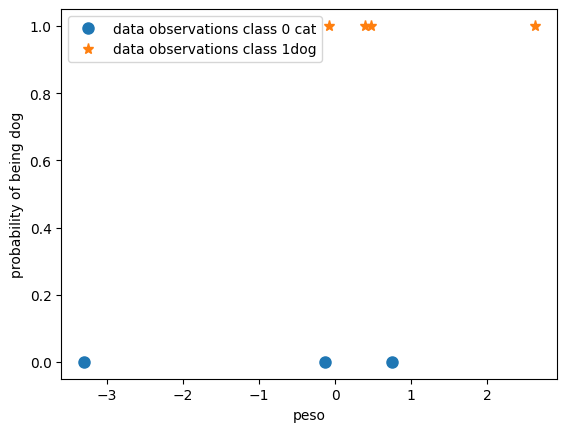

In [19]:
## =============== ##
## Define our data ##
## =============== ##
color_c0 = 'C0'
color_c1 = 'C1'

# input to our model. Represents time in seconds
x_data = torch.from_numpy(np.array([-0.13459237,-3.3015387,0.74481176,2.62434536,0.38824359,0.47182825,-0.07296862]).reshape(7,1)).float()
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = torch.from_numpy(np.array([0,0,0,1,1,1,1]).reshape(7,1)).float()


## display
idx_class0 = t_data == 0
idx_class1 = t_data == 1
plt.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = r'data observations class 0 cat')
plt.plot(x_data[idx_class1],t_data[idx_class1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
plt.xlabel('peso')
plt.ylabel('probability of being dog')
plt.legend()

### 2.2 Initialization

Initialize the parameters of the model, in this case $w$ and $b$. Following our previous step. Again use the data structure you prefer for this (we will see later in future assesments how parameters are handled by pytorch).

In [20]:
if assesment_draw_and_fill:
    code = """
```python
w = ...
w.requires_grad = ...
b = ...
b.requires_grad = ...

parameters = [(w,b)]
```
"""
    display(Markdown(code))

In [21]:
w = torch.from_numpy(np.ones((1,1))).float()
w.requires_grad = True
b = torch.from_numpy(np.zeros(1)).float()
b.requires_grad = True

parameters = [(w,b)]

### 2.3 Computational graph creation

Implement the following computational graph, and wrap it in a forward function as before. However, give it now  a boolean option to apply the sigmoid activation function or not. You'll see later why.

$$
\begin{split}
z = w\cdot x+ b\\
y = \frac{1}{1 + \exp^{-z}}
\end{split}
$$


```python
def forward(X,parameters, apply_sigmoid : bool):
    ...  
    return y
```

In [22]:

if assesment_draw_and_fill:
    code = """
```python

def forward(X,parameters, apply_sigmoid):
    for w,b in parameters:
        z = X ... w ... b

    if apply_sigmoid:
        y = ...
    else:
        y = z
        
    return y
    
```"""
    display(Markdown(code))

In [23]:
def forward(X,parameters, apply_sigmoid):
    for w,b in parameters:
        z = torch.mm(X,w) + b

    if apply_sigmoid:
        y = torch.sigmoid(z)
    else:
        y = z
        
    return y

### 2.4 Loss function computation

Implement two possible loss function using either custom implementation or torch.nn losses. Implement brier score (which remember is the same as sum of squared errors) and binary cross entropy loss.

There are two options two compute the bce loss in pytorch:

* BCE from logits: https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html
* BCE: https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

Both losses are exactly the same but differ in which information is passed in. BCE receives the output of the output activation function (or link function), i.e. the output of the sigmoid function which we haved denoted as $y$, while BCE from logits receives the input to the link funciton, i.e the input to the sigmoid which we have denoted by $z$. This value $z$ receives the special name of \emph{logit}. So the logit is the input to the link function or output activation function.

The reason why pytorch has these two implementations? Numerical stability. As you'll see in modern machine learning software many loss functions always receive the logit rather than the output of the activation function, because internally when pytorch compute the gradient it can yield a more numerical stable computation of the gradient.

This is the reason why the forward function you have implemented should received an argument that specifies whether the sigmoid is applied or not. Btw when using the Brier score, the MSELoss receives $y$ always. Usually if a function receives the logit or not is specified in the function description and as you can see MSELoss do not specify that it should receive the logit.

On the other hand, note that the computation or not of the sigmoid activation function is just for training purposes. If you want to plot the regressed function or just make some predictions, you need to apply the sigmoid.

Implement two functions implementing both losses. Use either BCE or BCEWithLogits, you are totally free.

```python
def loss_function_brier(t,y):
    ...
    return L
    
def loss_function_bce(t,y):
    ...
    return L
```


In [24]:
def loss_function_brier(t,y):
    L = torch.nn.functional.mse_loss(y,t)
    return L
    
def loss_function_bce(t,y):
    L = torch.nn.functional.binary_cross_entropy_with_logits(y,t)
    return L

### 2.5 Implement gradient descent

Implement gradient descent. Be aware of your chocices before to know how to compute the foward operation (apply sigmoid or not).

Remember the steps are:

1. Initialize the model
2. Forward
3. Loss computation
4. Backward
5. Parameter update
6. Reseting gradients on the parameters

Implement two plots, one plot should show the current model learnt, and the other a plot that shows the loss over the course of learning.

In [25]:
if assesment_draw_and_fill:
    
    code = """```python

loss_type = 'bce'

if loss_type not in ["bce","brier"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
x_range = torch.linspace(-4,4,100).view(100,1)

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 100
lr = 0.5

# 1. Initialize the model
w = ... 
w.requires_grad = ...
b = ...
b.requires_grad = ...

parameters = [(w,b)]
loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    if loss_type == "bce":
        z_data = ...
        L = ...
        
    elif loss_type == "brier":
        y_data =  ...
        L = ...
    
    # 3. Backward
    L.backward()
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b in parameters:
        ...
        ...
        
    # 6 Zero grad
    ...
    ...
    
    ## Plotting
    ax1.cla()
    ax2.cla()
    
    with torch.no_grad():
        
        ax1.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = r'data observations class 0 cat')
        ax1.plot(x_data[idx_class1],t_data[idx_class1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
        ax1.plot(x_range, forward(x_range, parameters, apply_sigmoid = True), label = 'model')
        ax1.set_xlabel('peso')
        ax1.set_ylabel('probability of being dog')
        ax1.set_ylim([-0.5,1.5])
        ax1.set_xlim([-4,4])
        ax1.legend()
        
        ax2.plot(np.arange(0,e+1),loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")
    
    ## ========================
    ## save for video generation
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()
```"""
    
    display(Markdown(code))

In [26]:
loss_type = 'bce'

if loss_type not in ["bce","brier"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
x_range = torch.linspace(-4,4,100).view(100,1)

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 100
lr = 0.5

# 1. Initialize the model
w = torch.from_numpy(-10*np.ones((1,1))).float()
w.requires_grad = True
b = torch.from_numpy(-4*np.ones(1)).float()
b.requires_grad = True

parameters = [(w,b)]
loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    if loss_type == "bce":
        z_data = forward(x_data,parameters, apply_sigmoid = False) 
        L = loss_function_bce(t_data,z_data)
        
    elif loss_type == "brier":
        y_data = forward(x_data,parameters, apply_sigmoid = True)
        L = loss_function_brier(t_data,y_data)
    
    # 3. Backward
    L.backward()
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b in parameters:
        w.data = w.data -lr * w.grad
        b.data = b.data -lr * b.grad
        
    # 6 Zero grad
    w.grad.zero_()
    b.grad.zero_()
    
    ## Plotting
    ax1.cla()
    ax2.cla()
    
    with torch.no_grad():
        
        ax1.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = r'data observations class 0 cat')
        ax1.plot(x_data[idx_class1],t_data[idx_class1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
        ax1.plot(x_range, forward(x_range, parameters, apply_sigmoid = True), label = 'model')
        ax1.set_xlabel('peso')
        ax1.set_ylabel('probability of being dog')
        ax1.set_ylim([-0.5,1.5])
        ax1.set_xlim([-4,4])
        ax1.legend()
        
        ax2.plot(np.arange(0,e+1),loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")
    
    ## ========================
    ## save for video generation
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [27]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

## 3. Regression from $f:\mathbb{R}^2 \rightarrow [0,1]$

Let's work now on the classification problem represented on a 2D plane and with colors. What you'll see know is how pytorch is able to handle derivatives of whatever, even matrices or vectors, by just specifying the forward computational graph.

Let's come back to our problem where our input $x \in \mathbb{R}^2$ have features will be $x_1$ peso and $x_2$ height.


$$
\begin{split}
(x^1_{1},x^1_{2},t^1) &= (0,1,0)\\
(x^2_{1},x^2_{2},t^2) &= (1.5,2.0,0)\\
(x^3_{1},x^3_{2},t^3) &= (2,1,0)\\
(x^4_{1},x^4_{2},t^4) &= (2.5,2,0)\\
(x^5_{1},x^5_{2},t^5) &= (3,4,1)\\
(x^6_{1},x^6_{2},t^6) &= (4,5,1)\\
(x^7_{1},x^7_{2},t^7) &= (5,1,1)\\
\end{split}
$$

### 3.1 Plot data

Use blue color (C0) and asterisc $o$ and orange color (C1) and circle $*$ to differentiate classes. Use a 2 dimensional plot, where x and y axis represents the input feature coordinates, and the color and symbol represents the label. Wrap in torch tensors.

In [28]:
if assesment_draw_and_fill:
    
    code = """```python    
## =============== ##
## Define our data ##
## =============== ##
color_c0 = 'C0'
color_c1 = 'C1'

# input to our model. Represents time in seconds
x_data = torch.from_numpy( 
                          np.array([[0,1],
                                   [1.5,2.0],
                                   [2,1],
                                   [2.5,2],
                                   [3,4],
                                   [4,5],
                                   [5,1]]).reshape(...,...)
                         ).float()

# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data =  torch.from_numpy((...).reshape(...,1)).float()

## display
fig = plt.figure()
idx_class0 = torch.squeeze(t_data == 0)
idx_class1 = torch.squeeze(t_data == 1)
plt.plot(x_data[idx_class0][:,0],x_data[idx_class0][:,1],'o', color = color_c0, markersize = 8, label = r'observations class 0 cat')
plt.plot(x_data[idx_class1][:,0],x_data[idx_class1][:,1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
plt.xlabel('peso ($x_1$)')
plt.ylabel('altura ($x_2$)')
plt.xlim([-2,7])
plt.ylim([-2,7])
plt.legend()
```"""
    display(Markdown(code))

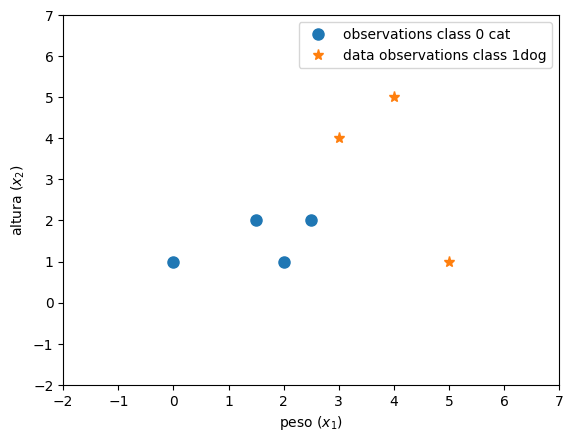

In [29]:
## =============== ##
## Define our data ##
## =============== ##
color_c0 = 'C0'
color_c1 = 'C1'

# input to our model. Represents time in seconds
x_data = torch.from_numpy( 
                          np.array([[0,1],
                                   [1.5,2.0],
                                   [2,1],
                                   [2.5,2],
                                   [3,4],
                                   [4,5],
                                   [5,1]]).reshape(7,2)
                         ).float()

# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data =  torch.from_numpy(np.array([0,0,0,0,1,1,1]).reshape(7,1)).float()

## display
fig = plt.figure()
idx_class0 = torch.squeeze(t_data == 0)
idx_class1 = torch.squeeze(t_data == 1)
plt.plot(x_data[idx_class0][:,0],x_data[idx_class0][:,1],'o', color = color_c0, markersize = 8, label = r'observations class 0 cat')
plt.plot(x_data[idx_class1][:,0],x_data[idx_class1][:,1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
plt.xlabel('peso ($x_1$)')
plt.ylabel('altura ($x_2$)')
plt.xlim([-2,7])
plt.ylim([-2,7])
plt.legend()

### 3.2 Initialization

Initialize the parameters of the model, in this case $w_1$, $w_2$ and $b$. However, in this case, we will treat the weights as a vector and the bias as a single scalar, i.e. $w \in \mathbb{R}^2$, $b\in\mathbb{R}$. So in other words, your weights parameter should be a vector containing the weight for each dimension:

$$
\begin{split}
w = \begin{bmatrix}w_1 \\ w_2\end{bmatrix}\\
\end{split}
$$


Following our previous step. Again use the data structure you prefer to keep the parameters.

In [30]:
if assesment_draw_and_fill:
    
    code = """```python   
dim_in = ...
dim_out = ...

w = torch.from_numpy(np.ones((...,...))).float()
w.requires_grad = True
b = torch.from_numpy(np.zeros(...)).float()
b.requires_grad = ...

parameters = [(w,b)]
```
"""
    display(Markdown(code))

In [31]:
dim_in = 2
dim_out = 1

w = torch.from_numpy(np.ones((dim_in,dim_out))).float()
w.requires_grad = True
b = torch.from_numpy(np.zeros(dim_out)).float()
b.requires_grad = True

parameters = [(w,b)]

### 3.3 Computational graph creation

Implement the forward computational graph as in section 2.3. Try and avoid explicit for loops in python to compute the forward computational graph. In other words, use matrix multiplication.

Remember the model we are computing know can be written as:

$$
\begin{split}
z = w_1\cdot x_1 + w_2 \cdot x_2 + b\\
y = \frac{1}{1 + \exp^{-z}}
\end{split}
$$

or in a more compact form

$$
\begin{split}
z = x^T w + b\\
y = \frac{1}{1 + \exp^{-z}}
\end{split}
$$

where $w$ and $x$ are now vectors:

$$
w = \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}
$$

$$
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
$$

Note that the non-compact form would require a for loop iterating over the elements of $w$. Try to implementing it the second form.


```python
def forward(X,parameters, apply_sigmoid : bool):
    ...  
    return y
```

In [32]:
if assesment_draw_and_fill:
    
    code = """```python   
def forward(X,parameters, apply_sigmoid):
    for w,b in parameters:
        z = ...

    if apply_sigmoid:
        y = ...
    else:
        y = ...
        
    return y  
```"""
    
    display(Markdown(code))

In [33]:
def forward(X,parameters, apply_sigmoid):
    for w,b in parameters:
        z = torch.mm(X,w) + b

    if apply_sigmoid:
        y = torch.sigmoid(z)
    else:
        y = z
        
    return y

### 3.4 Loss function computation

Since we are on a binary classification problem, loss computation is exactly the same as in section 2.4. So just copy paste the functions you implemented.

In [34]:
def loss_function_brier(t,y):
    L = torch.nn.functional.mse_loss(y,t)
    return L
    
def loss_function_bce(t,y):
    L = torch.nn.functional.binary_cross_entropy_with_logits(y,t)
    return L

### 3.5 Implement gradient descent

Implement gradient descent. Be aware of your chocices before to know how to compute the foward operation (apply sigmoid or not).

Remember the steps are:

1. Initialize the model
2. Forward
3. Loss computation
4. Backward
5. Parameter update
6. Reseting gradients on the parameters

Implement two plots, one plot should show the current model learnt (but know showing the decision threshold i.e. the probability from which you will consider one class or another), and the other a plot that shows the loss over the course of learning.

In [35]:
if assesment_draw_and_fill:
    
    code = """```python   
loss_type = 'bce'

if loss_type not in ["bce","brier"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,20))

N_points_domain = 100
thr_prob = 0.5 # use to plot our classification guess
x1, x2 = np.meshgrid(np.linspace(-2,7,N_points_domain),np.linspace(-2,7,N_points_domain))

# reshape for neural network
x_range = torch.from_numpy(
    np.hstack((np.reshape(x1, (N_points_domain**2,1)),np.reshape(x2, (N_points_domain**2,1))))
).float()

# allocate memory to plot decision thresholds
y_range_plot = np.zeros((N_points_domain,N_points_domain), np.float32)

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 10
lr = 0.5

# 1. Initialize the model
dim_in = ...
dim_out = ...

w = torch.from_numpy(np.ones((...,...))).float()
w.requires_grad = ...
b = torch.from_numpy(np.zeros(...)).float()
b.requires_grad = ...

parameters = [(w,b)]

loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    if loss_type == "bce":
        z_data = ...
        L = ...
        
    elif loss_type == "brier":
        y_data = ...
        L = ...
    
    # 3. Backward
    ...
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b in parameters:
        w.data = ...
        b.data ...
        
    # 6 Zero grad
    ...
    ...
    
    with torch.no_grad():
        ## forward to plot decision thresholds
        y_range = ...
    
        # reshape back to plotting
        y_range = np.reshape(y_range, (N_points_domain,N_points_domain))
        
        # start plotting
        ax1.cla()
        ax2.cla()

        # plot dataset    
        ax1.plot(x_data[idx_class0][:,0],x_data[idx_class0][:,1],'o', color = color_c0, markersize = 8, label = r'observations class 0 cat')
        ax1.plot(x_data[idx_class1][:,0],x_data[idx_class1][:,1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
        ax1.set_xlabel('peso ($x_1$)')
        ax1.set_ylabel('altura ($x_2$)')

        ## plot prediction probability for class 1 and 0
        idx_range1 = y_range > thr_prob
        idx_range0 = ~idx_range1

        y_range_plot[idx_range1] = y_range[idx_range1]
        y_range_plot[idx_range0] = np.nan

        ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
        contourf1 = ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)

        y_range_plot[idx_range0] = y_range[idx_range0]
        y_range_plot[idx_range1] = np.nan

        ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Blues"), alpha = 0.5)
        contourf2 = ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Blues"), alpha = 0.5)

        # decision threshold
        contour1 = ax1.contour(x1, x2, y_range, levels = [thr_prob], colors = ["k"], linewidth = 4, label = f'decision threshold p = {thr_prob}')
        ax1.clabel(contour1, inline=True, fontsize=8, fmt="%.2f")

        ## set legend
        ax1.legend()

        ## set contour bar level
        if e == 0:
            cbar2 = fig.colorbar(contourf2, ax=ax1, orientation='vertical')
            cbar2.set_label('Probability of being a cat')

            #cbar1 = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Ajusta la posición [izq, abajo, ancho, alto]
            cbar1 = fig.colorbar(contourf1, ax=ax1, orientation='vertical')
            cbar1.set_label('Probability of being a dog')

        ax2.plot(np.arange(0,e+1),loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")

    ## ========================
    ## save for video generation
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()
```"""
    
    display(Markdown(code))

In [36]:
loss_type = 'bce'

if loss_type not in ["bce","brier"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,20))

N_points_domain = 100
thr_prob = 0.5 # use to plot our classification guess
x1, x2 = np.meshgrid(np.linspace(-2,7,N_points_domain),np.linspace(-2,7,N_points_domain))

# reshape for neural network
x_range = torch.from_numpy(
    np.hstack((np.reshape(x1, (N_points_domain**2,1)),np.reshape(x2, (N_points_domain**2,1))))
).float()

# allocate memory to plot decision thresholds
y_range_plot = np.zeros((N_points_domain,N_points_domain), np.float32)

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 10
lr = 0.5

# 1. Initialize the model
dim_in = 2
dim_out = 1

w = torch.from_numpy(np.ones((dim_in,dim_out))).float()
w.requires_grad = True
b = torch.from_numpy(np.zeros(1)).float()
b.requires_grad = True

parameters = [(w,b)]

loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    if loss_type == "bce":
        z_data = forward(x_data,parameters, apply_sigmoid = False) 
        L = loss_function_bce(t_data,z_data)
        
    elif loss_type == "brier":
        y_data = forward(x_data,parameters, apply_sigmoid = True)
        L = loss_function_brier(t_data,y_data)
    
    # 3. Backward
    L.backward()
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b in parameters:
        w.data = w.data -lr * w.grad
        b.data = b.data -lr * b.grad
        
    # 6 Zero grad
    w.grad.zero_()
    b.grad.zero_()
    
    with torch.no_grad():
        ## forward to plot decision thresholds
        y_range = forward(x_range,parameters, apply_sigmoid = True)
    
        # reshape back to plotting
        y_range = np.reshape(y_range, (N_points_domain,N_points_domain))
        
        # start plotting
        ax1.cla()
        ax2.cla()

        # plot dataset    
        ax1.plot(x_data[idx_class0][:,0],x_data[idx_class0][:,1],'o', color = color_c0, markersize = 8, label = r'observations class 0 cat')
        ax1.plot(x_data[idx_class1][:,0],x_data[idx_class1][:,1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
        ax1.set_xlabel('peso ($x_1$)')
        ax1.set_ylabel('altura ($x_2$)')

        ## plot prediction probability for class 1 and 0
        idx_range1 = y_range > thr_prob
        idx_range0 = ~idx_range1

        y_range_plot[idx_range1] = y_range[idx_range1]
        y_range_plot[idx_range0] = np.nan

        ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
        contourf1 = ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)

        y_range_plot[idx_range0] = y_range[idx_range0]
        y_range_plot[idx_range1] = np.nan

        ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Blues"), alpha = 0.5)
        contourf2 = ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Blues"), alpha = 0.5)

        # decision threshold
        contour1 = ax1.contour(x1, x2, y_range, levels = [thr_prob], colors = ["k"], linewidth = 4, label = f'decision threshold p = {thr_prob}')
        ax1.clabel(contour1, inline=True, fontsize=8, fmt="%.2f")

        ## set legend
        ax1.legend()

        ## set contour bar level
        if e == 0:
            cbar2 = fig.colorbar(contourf2, ax=ax1, orientation='vertical')
            cbar2.set_label('Probability of being a cat')

            #cbar1 = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Ajusta la posición [izq, abajo, ancho, alto]
            cbar1 = fig.colorbar(contourf1, ax=ax1, orientation='vertical')
            cbar1.set_label('Probability of being a dog')

        ax2.plot(np.arange(0,e+1),loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")

    ## ========================
    ## save for video generation
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

/tmp/ipykernel_16648/3402862807.py:91: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
/tmp/ipykernel_16648/3402862807.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  contourf1 = ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
/tmp/ipykernel_16648/3402862807.py:97: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or `

In [37]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

## 4. Non Linear Regresion $f:\mathbb{R} \rightarrow \mathbb{R}$

Let's come again to our initial regresion problem $f:\mathbb{R} \rightarrow \mathbb{R}$, where our data was:

$$
(x_1,t_1) = (0,0.2)\\
(x_2,t_2) = (1,0.5)\\
(x_3,t_3) = (2,2.8)
$$

Our objective know is to model the functional relationship between $x$ and $t$ using a non-linear model which we will implement using a simple form of a neural network, of your choice.

Again, for completeness, let's follow the previous steps

### 4.1 Plot the data

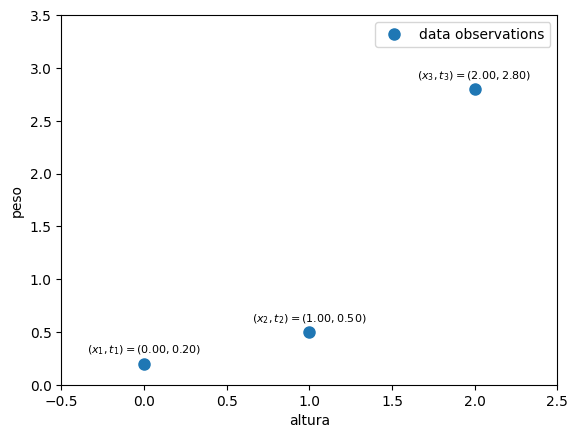

In [38]:
# input to our model. Represents time in seconds
x_data = torch.from_numpy(np.array([0,1,2]).reshape(3,1)).float()
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = torch.from_numpy(np.array([0.2,0.5,2.8]).reshape(3,1)).float()

## display
fig = plt.figure()
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
for i in range(len(x_data)):
    plt.text(x_data[i], t_data[i] + 0.1, f"$(x_{i+1},t_{i+1})=({float(x_data[i]):.2f},{float(t_data[i]):.2f})$", fontsize=8, ha="center")  # Etiqueta sobre el punto
plt.xlabel('altura')
plt.ylabel('peso')
plt.ylim([0,3.5])
plt.xlim([-0.5,2.5])
plt.legend()

### 4.2 Initialization

Let's initialize the parameters of the network. As you know, each layer of the network is parameterize by a matrix and a vector of biases, plus the activation function used in that layer.

Thus, you must create an initialization function, that receives the input and output dimension of your problem, the number of layers, the neuron per layers, and the activation function to use.

I am going to assume that all layers will have the same number of neurons and activation function but you can make this function customizable to allow different number of neurons and activation per layer, just change function arguments to list, for example. Again return a data structure that keeps the parameters of your model

```python
def initialize_network(num_neurons, num_hidden_layers, hidden_activation_function, output_activation_function, Dx, Dout):
    torch.manual_seed(seed = 1) # fix a random seed so that initialization is deterministic
    
    return parameters
```

In [39]:
if assesment_draw_and_fill:
    
    code = """```python 
def linear_act_fun(x):
    return x

def initialize_network(num_neurons, num_hidden_layers, hidden_activation_function, output_activation_function, Dx, Dout):
    torch.manual_seed(seed = 1) # fix a random seed so that initialization is deterministic
    np.random.seed(seed = 1)
    
    parameters = []
    dim_in = ...
    dim_out = ...
    
    for l in range(num_hidden_layers+1):
        w = torch.from_numpy(np.random.randn(...,...)).float()
        w.requires_grad = ...
        b = torch.zeros((...,), requires_grad = ..., dtype = torch.float)
        
        if l == num_hidden_layers:
            
            if output_activation_function == 'sigmoid':
                fun_pointer = ...
            elif output_activation_function == 'relu':
                fun_pointer = ...
            elif output_activation_function == 'linear':
                fun_pointer = ...
                
        elif hidden_activation_function == 'tanh':
            fun_pointer = ...
            
        else:
            raise ValueError("Activation function can only be tanh")

        ## add to parameter list
        parameters.append((w,b,fun_pointer))
    
        ## then input dimension is num_neurons
        dim_in = ...
        
        ## when we are in the last layer, the output dimension is the target dimension.
        if l == num_hidden_layers-1:
            dim_out = ...
    
    return parameters
```"""
    display(Markdown(code))

In [40]:
def linear_act_fun(x):
    return x

def initialize_network(num_neurons, num_hidden_layers, hidden_activation_function, output_activation_function, Dx, Dout):
    torch.manual_seed(seed = 1) # fix a random seed so that initialization is deterministic
    np.random.seed(seed = 1)
    
    parameters = []
    dim_in = Dx
    dim_out = num_neurons
    
    for l in range(num_hidden_layers+1):
        w = torch.from_numpy(np.random.randn(dim_in,dim_out)).float()
        w.requires_grad = True
        b = torch.zeros((dim_out,), requires_grad = True, dtype = torch.float)
        
        if l == num_hidden_layers:
            
            if output_activation_function == 'sigmoid':
                fun_pointer = torch.sigmoid
            elif output_activation_function == 'relu':
                fun_pointer = torch.relu
            elif output_activation_function == 'linear':
                fun_pointer = linear_act_fun
                
        elif hidden_activation_function == 'tanh':
            fun_pointer = torch.tanh
            
        else:
            raise ValueError("Activation function can only be tanh")

        ## add to parameter list
        parameters.append((w,b,fun_pointer))
    
        ## then input dimension is num_neurons
        dim_in = num_neurons
        
        ## when we are in the last layer, the output dimension is the target dimension.
        if l == num_hidden_layers-1:
            dim_out = Dout
    
    return parameters

### 4.3 Computational graph creation

Implement the forward computational graph as previosly done. So basically create a forward function, however know, just provide the argument: apply output activation or apply link function instead of sigmoid, because sigmoid could be use as a hidden layer activation function, so to make the difference.


```python
def forward(X,parameters, apply_link_fun : bool):
    ...  
    return y
```

Remember the model we are computing know can be written as:


$$
\begin{split}
z_1 &= x^T W^1 + b^1\\
h_1 &= \phi(z_1)\\
---&---------- \text{ proyection to layer 1}\\
%
z_2 &= h_1^T W^2 + b^2\\
h_2 &= \phi(z_2)\\
---&---------- \text{ proyection to layer 2}\\
%
&\,\,\vdots\\
%
z_o &= h_{l-1}^T W^{l} + b^{l}\\
y &= \Phi(z_o)\\
---&---------- \text{ proyection to output layer}\\
\end{split}
$$

where $\phi$ denotes the hidden layer element-wise activation function and $\Phi$ the link function. In this case note that it would be rather beneficial to use a ReLu link function because our data is possitive.


In [41]:
if assesment_draw_and_fill:

    code = """```python
def forward(X, parameters, apply_link_fun):
    
    H = X
    
    for l, (W,b,act_fun) in enumerate(parameters[0:-2]):
        Z = ...
        ## apply activation function on each layer. On last layer check whether the argumetn was specified or not
        H = act_fun(...)
    
    ## project output layer
    W, b, act_fun = parameters[-1]
    
    Z = ...
    
    if apply_link_fun:
        H = act_fun(Z)
        
    Y = H
    return Y
```
"""
    
    display(Markdown(code))

In [42]:
def forward(X, parameters, apply_link_fun):
    
    H = X
    
    for l, (W,b,act_fun) in enumerate(parameters):
        Z = torch.mm(H,W) + b
        ## apply activation function on each layer. On last layer check whether the argumetn was specified or not
        H = Z
        if not( not apply_link_fun and l == len(parameters)-1 ) :
            H = act_fun(Z)
    Y = H
    return Y

### 4.4 Loss function computation

Implement two possible lost funciton, absolute and squared using either your implementation or pytorch loss functions.



In [43]:
def loss_function_square(t,y):
    L = torch.nn.functional.mse_loss(y,t)
    return L
    
def loss_function_absolute(t,y):
    L = torch.nn.functional.l1_loss(y,t)
    return L

### 4.5 Implement gradient descent

Implement gradient descent. Note that your code should be nearly equal to that in section 1.5, with just needing to call your function to initialize the model parameters.

Remember the steps are:

1. Initialize the model
2. Forward
3. Loss computation
4. Backward
5. Parameter update
6. Reseting gradients on the parameters

Implement two plots, one plot should show the current model learnt (but know showing the decision threshold i.e. the probability from which you will consider one class or another), and the other a plot that shows the loss over the course of learning.

In [44]:
if assesment_draw_and_fill:
    code = """```python
loss_type = 'sse'

if loss_type not in ["sse","abs"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
x_range = torch.linspace(-1,3,20).view(20,1)

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = ...
lr = ...

# 1. Initialize the model
Dx = ...
Dout = ...
num_neurons = ...
num_hidden_layers = ...
hidden_activation_function = 'tanh'
output_activation_function = ...
parameters = initialize_network(..., ..., ..., ..., ..., ...)

loss_acc = []
for e in range(...):
    
    # 2. Forward and loss computation
    y_data = ... 
    
    if loss_type == "sse":
        L = ...
        
    elif loss_type == "abs":
        L = ...
    
    # 3. Backward
    ...
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b,_ in parameters:
        ...
        ...
        
    # 6 Zero grad
    ...
    ...
    
    ## Plotting
    ax1.cla()
    ax2.cla()
    
    with torch.no_grad():
        
        ax1.plot(...,...,'o',label = 'observations')
        ax1.plot(x_range,forward(x_range, parameters,  apply_link_fun = ...),label = 'model')
        ax1.set_xlabel('altura')
        ax1.set_ylabel('peso')
        ax1.set_ylim([-3,3.5])
        ax1.set_xlim([-0.5,2.5])
        ax1.legend()
        
        ax2.plot(np.arange(0,e+1),loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")
    
    ## ========================
    ## save for video generation
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()
```"""
    display(Markdown(code))

In [45]:
loss_type = 'sse'

if loss_type not in ["sse","abs"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
x_range = torch.linspace(-1,3,20).view(20,1)

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 100
lr = 0.1

# 1. Initialize the model
Dx = 1
Dout = 1
num_neurons = 2
num_hidden_layers = 1
hidden_activation_function = 'tanh'
output_activation_function  ='relu'
parameters = initialize_network(num_neurons, num_hidden_layers, hidden_activation_function, output_activation_function, Dx, Dout)

loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    y_data = forward(x_data,parameters, apply_link_fun = True) 
    
    if loss_type == "sse":
        L = loss_function_square(t_data,y_data)
        
    elif loss_type == "abs":
        L = loss_function_absolute(t_data,y_data)
    
    # 3. Backward
    L.backward()
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b,_ in parameters:
        w.data = w.data -lr * w.grad
        b.data = b.data -lr * b.grad
        
    # 6 Zero grad
    w.grad.zero_()
    b.grad.zero_()
    
    ## Plotting
    ax1.cla()
    ax2.cla()
    
    with torch.no_grad():
        
        ax1.plot(x_data,t_data,'o',label = 'observations')
        ax1.plot(x_range,forward(x_range, parameters,  apply_link_fun = True),label = 'model')
        ax1.set_xlabel('altura')
        ax1.set_ylabel('peso')
        ax1.set_ylim([-3,3.5])
        ax1.set_xlim([-0.5,2.5])
        ax1.legend()
        
        ax2.plot(np.arange(0,e+1),loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")
    
    ## ========================
    ## save for video generation
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [46]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

## 5.  Regression from $f:\mathbb{R} \rightarrow [0,1]$

Let's repeat this process but now using our regression problem to the unit cube. Let's repeat the process of regresion but using our two loss functions, named Binary Cross Entropy and Brier score. This time, we will just use pytorch function wrappers. You could use custom implementation if you want, however in a real world scenario if available then use always pytorch implementations.

Our data was:

$$
\begin{split}
(x_1,t_1) &= (-0.13459237,0)\\
(x_2,t_2) &= (-3.3015387,0)\\
(x_3,t_3) &= (0.74481176,0)\\
(x_4,t_4) &= (2.62434536,1)\\
(x_5,t_5) &= (0.38824359,1)\\
(x_6,t_6) &= (0.47182825,1)\\
(x_7,t_7) &= (-0.07296862,1)\\
\end{split}
$$


### 5.1 Plot the data

Plot the data as before.

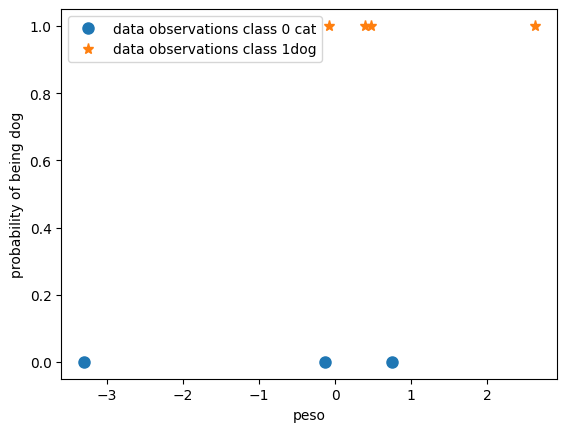

In [47]:
## =============== ##
## Define our data ##
## =============== ##
color_c0 = 'C0'
color_c1 = 'C1'

# input to our model. Represents time in seconds
x_data = torch.from_numpy(np.array([-0.13459237,-3.3015387,0.74481176,2.62434536,0.38824359,0.47182825,-0.07296862]).reshape(7,1)).float()
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = torch.from_numpy(np.array([0,0,0,1,1,1,1]).reshape(7,1)).float()


## display
idx_class0 = t_data == 0
idx_class1 = t_data == 1
fig = plt.figure()
plt.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = r'data observations class 0 cat')
plt.plot(x_data[idx_class1],t_data[idx_class1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
plt.xlabel('peso')
plt.ylabel('probability of being dog')
plt.legend()

### 5.2 Initialization

For initialization you can use the same function you've done in section 4.2, just use the adequate link function when calling it.

In [48]:
def linear_act_fun(x):
    return x

def initialize_network(num_neurons, num_hidden_layers, hidden_activation_function, output_activation_function, Dx, Dout):
    torch.manual_seed(seed = 1) # fix a random seed so that initialization is deterministic
    np.random.seed(seed = 1)
    
    parameters = []
    dim_in = Dx
    dim_out = num_neurons
    
    for l in range(num_hidden_layers+1):
        w = torch.from_numpy(np.random.randn(dim_in,dim_out)).float()
        w.requires_grad = True
        b = torch.zeros((dim_out,), requires_grad = True, dtype = torch.float)
        
        if l == num_hidden_layers:
            
            if output_activation_function == 'sigmoid':
                fun_pointer = torch.sigmoid
            elif output_activation_function == 'relu':
                fun_pointer = torch.relu
            elif output_activation_function == 'linear':
                fun_pointer = linear_act_fun
                
        elif hidden_activation_function == 'tanh':
            fun_pointer = torch.tanh
            
        else:
            raise ValueError("Activation function can only be tanh")

        ## add to parameter list
        parameters.append((w,b,fun_pointer))
    
        ## then input dimension is num_neurons
        dim_in = num_neurons
        
        ## when we are in the last layer, the output dimension is the target dimension.
        if l == num_hidden_layers-1:
            dim_out = Dout
    
    return parameters

### 5.3 Computational graph creation

Forward through the computational graph is again similar to that implemented in section 4.3, if implemented correclty.

In [49]:
def forward(X, parameters, apply_link_fun):
    
    H = X
    
    for l, (W,b,act_fun) in enumerate(parameters):
        Z = torch.mm(H,W) + b
        ## apply activation function on each layer. On last layer check whether the argumetn was specified or not
        H = Z
        if not( not apply_link_fun and l == len(parameters)-1 ) :
            H = act_fun(Z)
    Y = H
    return Y

### 5.4 Loss function computation

For loss function you should use those from section 2.4/3.4

In [50]:
def loss_function_brier(t,y):
    L = torch.nn.functional.mse_loss(y,t)
    return L
    
def loss_function_bce(t,y):
    L = torch.nn.functional.binary_cross_entropy_with_logits(y,t)
    return L

### 5.5 Implement gradient descent

Implement gradient descent. You should be able to mostly copy paste code in section 3.5. Be aware when calling initialize_network function to use the adequate link function.

In [51]:
if assesment_draw_and_fill:
    code = """```python
loss_type = 'bce'

if loss_type not in ["bce","brier"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
x_range = torch.linspace(-4,4,100).view(100,1)

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 500
lr = 0.5

# 1. Initialize the model
Dx = ...
Dout = ...
num_neurons = ...
num_hidden_layers = ...
hidden_activation_function = ...
output_activation_function  = ...
parameters = initialize_network(..., ..., ..., ..., ..., ...)

loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    if loss_type == "bce":
        z_data = ...
        L = ...
        
    elif loss_type == "brier":
        y_data = ...
        L = ...
    
    # 3. Backward
    ...
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b,_ in parameters:
        ...
        ...
        
    # 6 Zero grad
    ...
    ...
    
    ## Plotting
    ax1.cla()
    ax2.cla()
    
    with torch.no_grad():
        
        ax1.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = r'data observations class 0 cat')
        ax1.plot(x_data[idx_class1],t_data[idx_class1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
        ax1.plot(x_range, forward(x_range, parameters, apply_link_fun = True), label = 'model')
        ax1.set_xlabel('peso')
        ax1.set_ylabel('probability of being dog')
        ax1.set_ylim([-0.5,1.5])
        ax1.set_xlim([-4,4])
        ax1.legend()
        
        ax2.plot(np.arange(0,e+1),loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")
    
    ## ========================
    ## save for video generation
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()
```"""
    
    display(Markdown(code))

In [52]:
loss_type = 'bce'

if loss_type not in ["bce","brier"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
x_range = torch.linspace(-4,4,100).view(100,1)

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 500
lr = 0.5

# 1. Initialize the model
Dx = 1
Dout = 1
num_neurons = 2
num_hidden_layers = 1
hidden_activation_function = 'tanh'
output_activation_function  ='sigmoid'
parameters = initialize_network(num_neurons, num_hidden_layers, hidden_activation_function, output_activation_function, Dx, Dout)

loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    if loss_type == "bce":
        z_data = forward(x_data,parameters, apply_link_fun = False) 
        L = loss_function_bce(t_data,z_data)
        
    elif loss_type == "brier":
        y_data = forward(x_data,parameters, apply_link_fun = True)
        L = loss_function_brier(t_data,y_data)
    
    # 3. Backward
    L.backward()
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b,_ in parameters:
        w.data = w.data -lr * w.grad
        b.data = b.data -lr * b.grad
        
    # 6 Zero grad
    w.grad.zero_()
    b.grad.zero_()
    
    ## Plotting
    ax1.cla()
    ax2.cla()
    
    with torch.no_grad():
        
        ax1.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = r'data observations class 0 cat')
        ax1.plot(x_data[idx_class1],t_data[idx_class1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
        ax1.plot(x_range, forward(x_range, parameters, apply_link_fun = True), label = 'model')
        ax1.set_xlabel('peso')
        ax1.set_ylabel('probability of being dog')
        ax1.set_ylim([-0.5,1.5])
        ax1.set_xlim([-4,4])
        ax1.legend()
        
        ax2.plot(np.arange(0,e+1),loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")
    
    ## ========================
    ## save for video generation
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [53]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)

## 6.  Regression from $f:\mathbb{R}^2 \rightarrow [0,1]$

Let's know reproduce the results on the classification problem with multiple input features. However, let's slighty modify the dataset to make it non linearly separable. Note that the previous dataset in section 3 was linearly separable and so in these cases using a linear logistic model is more than enough. 

To unlock the potential of neural networks, we need to make the data non linearly separable.

$$
\begin{split}
(x^1_{1},x^1_{2},t^1) &= (0,1,0)\\
(x^2_{1},x^2_{2},t^2) &= (1.5,2.0,0)\\
(x^3_{1},x^3_{2},t^3) &= (2,1,0)\\
(x^4_{1},x^4_{2},t^4) &= (2.5,2,0)\\
(x^5_{1},x^5_{2},t^5) &= (3,4,1)\\
(x^6_{1},x^6_{2},t^6) &= (4,5,1)\\
(x^7_{1},x^7_{2},t^7) &= (5,1,1)\\
\end{split}
$$

### 6.1 Plot the data

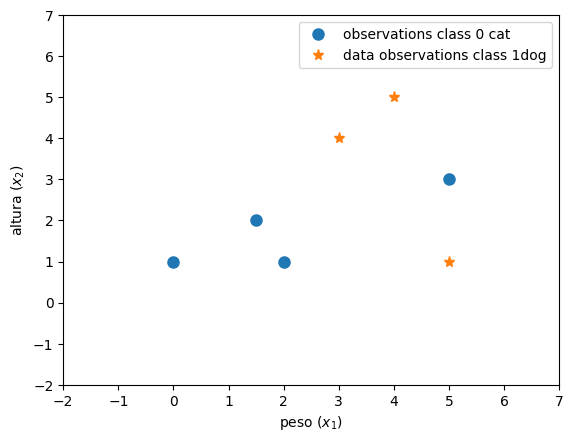

In [54]:
## =============== ##
## Define our data ##
## =============== ##
color_c0 = 'C0'
color_c1 = 'C1'

# input to our model. Represents time in seconds
x_data = torch.from_numpy( 
                          np.array([[0,1],
                                   [1.5,2.0],
                                   [2,1],
                                   [5,3],
                                   [3,4],
                                   [4,5],
                                   [5,1]]).reshape(7,2)
                         ).float()

# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data =  torch.from_numpy(np.array([0,0,0,0,1,1,1]).reshape(7,1)).float()

## display
fig = plt.figure()
idx_class0 = torch.squeeze(t_data == 0)
idx_class1 = torch.squeeze(t_data == 1)
plt.plot(x_data[idx_class0][:,0],x_data[idx_class0][:,1],'o', color = color_c0, markersize = 8, label = r'observations class 0 cat')
plt.plot(x_data[idx_class1][:,0],x_data[idx_class1][:,1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
plt.xlabel('peso ($x_1$)')
plt.ylabel('altura ($x_2$)')
plt.xlim([-2,7])
plt.ylim([-2,7])
plt.legend()

### 6.2 Initialization

To initialize the model, again we can you the same funciton implemented before.

In [55]:
def linear_act_fun(x):
    return x

def initialize_network(num_neurons, num_hidden_layers, hidden_activation_function, output_activation_function, Dx, Dout):
    torch.manual_seed(seed = 1) # fix a random seed so that initialization is deterministic
    np.random.seed(seed = 1)
    
    parameters = []
    dim_in = Dx
    dim_out = num_neurons
    
    for l in range(num_hidden_layers+1):
        w = torch.from_numpy(np.random.randn(dim_in,dim_out)).float()
        w.requires_grad = True
        b = torch.zeros((dim_out,), requires_grad = True, dtype = torch.float)
        
        if l == num_hidden_layers:
            
            if output_activation_function == 'sigmoid':
                fun_pointer = torch.sigmoid
            elif output_activation_function == 'relu':
                fun_pointer = torch.relu
            elif output_activation_function == 'linear':
                fun_pointer = linear_act_fun
                
        elif hidden_activation_function == 'tanh':
            fun_pointer = torch.tanh
            
        elif hidden_activation_function == 'relu':
            fun_pointer = torch.relu
        else:
            raise ValueError("Activation function can only be tanh")

        ## add to parameter list
        parameters.append((w,b,fun_pointer))
    
        ## then input dimension is num_neurons
        dim_in = num_neurons
        
        ## when we are in the last layer, the output dimension is the target dimension.
        if l == num_hidden_layers-1:
            dim_out = Dout
    
    return parameters

### 6.3 Computational graph creation

Computational graph creation, again, same code as previous section.

In [56]:
def forward(X, parameters, apply_link_fun):
    
    H = X
    
    for l, (W,b,act_fun) in enumerate(parameters):
        Z = torch.mm(H,W) + b
        ## apply activation function on each layer. On last layer check whether the argumetn was specified or not
        H = Z
        if not( not apply_link_fun and l == len(parameters)-1 ) :
            H = act_fun(Z)
    Y = H
    return Y

### 6.4 Loss function computation

Loss functions, again, same code as previous section

In [57]:
def loss_function_brier(t,y):
    L = torch.nn.functional.mse_loss(y,t)
    return L
    
def loss_function_bce(t,y):
    L = torch.nn.functional.binary_cross_entropy_with_logits(y,t)
    return L

### 6.5 Implement gradient descent

In [58]:
loss_type = 'bce'

if loss_type not in ["bce","brier"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,20))

N_points_domain = 100
thr_prob = 0.5 # use to plot our classification guess
x1, x2 = np.meshgrid(np.linspace(-2,7,N_points_domain),np.linspace(-2,7,N_points_domain))

# reshape for neural network
x_range = torch.from_numpy(
    np.hstack((np.reshape(x1, (N_points_domain**2,1)),np.reshape(x2, (N_points_domain**2,1))))
).float()

# allocate memory to plot decision thresholds
y_range_plot = np.zeros((N_points_domain,N_points_domain), np.float32)

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 200
lr = 0.001

# 1. Initialize the model
Dx = 2
Dout = 1
num_neurons = 10
num_hidden_layers = 2
hidden_activation_function = 'relu'
output_activation_function  ='sigmoid'
parameters = initialize_network(num_neurons, num_hidden_layers, hidden_activation_function, output_activation_function, Dx, Dout)


loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    if loss_type == "bce":
        z_data = forward(x_data,parameters, apply_link_fun = False) 
        L = loss_function_bce(t_data,z_data)
        
    elif loss_type == "brier":
        y_data = forward(x_data,parameters, apply_link_fun = True)
        L = loss_function_brier(t_data,y_data)
    
    # 3. Backward
    L.backward()
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b,_ in parameters:
        w.data = w.data -lr * w.grad
        b.data = b.data -lr * b.grad
        
    # 6 Zero grad
    w.grad.zero_()
    b.grad.zero_()
    
    with torch.no_grad():
        ## forward to plot decision thresholds
        y_range = forward(x_range,parameters, apply_link_fun = True)
    
        # reshape back to plotting
        y_range = np.reshape(y_range, (N_points_domain,N_points_domain))
        
        # start plotting
        ax1.cla()
        ax2.cla()

        # plot dataset    
        ax1.plot(x_data[idx_class0][:,0],x_data[idx_class0][:,1],'o', color = color_c0, markersize = 8, label = r'observations class 0 cat')
        ax1.plot(x_data[idx_class1][:,0],x_data[idx_class1][:,1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
        ax1.set_xlabel('peso ($x_1$)')
        ax1.set_ylabel('altura ($x_2$)')

        ## plot prediction probability for class 1 and 0
        idx_range1 = y_range > thr_prob
        idx_range0 = ~idx_range1

        y_range_plot[idx_range1] = y_range[idx_range1]
        y_range_plot[idx_range0] = np.nan

        ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
        contourf1 = ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)

        y_range_plot[idx_range0] = y_range[idx_range0]
        y_range_plot[idx_range1] = np.nan

        ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Blues"), alpha = 0.5)
        contourf2 = ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Blues"), alpha = 0.5)

        # decision threshold
        contour1 = ax1.contour(x1, x2, y_range, levels = [thr_prob], colors = ["k"], linewidth = 4, label = f'decision threshold p = {thr_prob}')
        ax1.clabel(contour1, inline=True, fontsize=8, fmt="%.2f")

        ## set legend
        ax1.legend()

        ## set contour bar level
        if e == 0:
            cbar2 = fig.colorbar(contourf2, ax=ax1, orientation='vertical')
            cbar2.set_label('Probability of being a cat')

            #cbar1 = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Ajusta la posición [izq, abajo, ancho, alto]
            cbar1 = fig.colorbar(contourf1, ax=ax1, orientation='vertical')
            cbar1.set_label('Probability of being a dog')

        ax2.plot(np.arange(0,e+1),loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")

    ## ========================
    ## save for video generation
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

/tmp/ipykernel_16648/170803117.py:90: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
/tmp/ipykernel_16648/170803117.py:91: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  contourf1 = ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
/tmp/ipykernel_16648/170803117.py:96: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``ma

In [59]:
# Mostrar el video en Jupyter Notebook
display(Video(data=video_filename, embed=True))
os.remove(video_filename)